## Hoja de trabajo 3
Gabriel García - 21352      
Javier Prado - 21486

1. Descargue los conjuntos de datos.    
2. Haga un análisis exploratorio extenso de los datos. Explique bien todos los hallazgos. No ponga solo gráficas y código. Debe llegar a conclusiones interesantes para poder predecir. Explique el preprocesamiento que necesitó hacer.            
3. Incluya un análisis de grupos en el análisis exploratorio. Explique las características de los grupos.                   
4. Divida el set de datos preprocesados en dos conjuntos: Entrenamiento y prueba. Describa 
el criterio que usó para crear los conjuntos: número de filas de cada uno, estratificado o n,
balanceado o no, etc. Explique en su documento como estan distribuidas las clase                               
5. 5labore el árbol de clasificación utilizando el conjunto de entrenamiento y la variable 
respuesta. Explique los resultados a los que llega. Muestre el modelo gráficamente. E 
experimento debe ser reproducible por lo que debe fijar que los conjuntos  e
entrenamiento y prueba sean los mismos siempre que se ejecute el código.        ódigo.
6. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algorit o para
clasificar y predecir, en dependencia de las características de la variable re                      spuesta.
7. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol
de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó  ás, donde
se equivocó menos y la importancia que tienen l                                    os errores.
8. Analice el desempeño del árbol d                       e regresión.
9. Realice pre-poda y post-poda y expliqu.e l                 os resultados

## Eda

In [131]:
#Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import graphviz No pude instalar la libreria 

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [104]:
df = pd.read_csv("medicina.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Height,Weight,Exercise,HealthyEating
0,23,F,HIGH,HIGH,25.355,drugY,167.494363,107.766413,0.0,0.0
1,47,M,LOW,HIGH,13.093,drugC,171.866737,43.332084,1.0,0.0
2,47,M,LOW,HIGH,10.114,drugC,178.318211,72.814734,1.0,1.0
3,28,F,NORMAL,HIGH,7.798,drugX,180.900052,56.813694,1.0,0.0
4,61,F,LOW,HIGH,18.043,drugY,167.937282,81.902153,1.0,0.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Sex            500 non-null    object 
 2   BP             500 non-null    object 
 3   Cholesterol    500 non-null    object 
 4   Na_to_K        500 non-null    float64
 5   Drug           500 non-null    object 
 6   Height         500 non-null    float64
 7   Weight         500 non-null    float64
 8   Exercise       500 non-null    float64
 9   HealthyEating  500 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 39.2+ KB


In [106]:
df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [107]:

# Cambiar los datos cualitativos a cuantitativos
bp_map ={"LOW": 0, "NORMAL": 1, "HIGH": 2}
sex_map = {"F": 0, "M": 1}
col_map = {"LOW": 0, "NORMAL": 1, "HIGH": 2}
drug_map = {"drugA": 0, "drugB": 1, "drugC": 2, "drugX": 3, "drugY": 4}
df["BP"] = df["BP"].map(bp_map)
df["Sex"] = df["Sex"].map(sex_map)
df["Drug"] = df["Drug"].map(drug_map)
df["Cholesterol"] = df["Cholesterol"].map(col_map)
print(df)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug      Height      Weight  \
0     23    0   2            2   25.355     4  167.494363  107.766413   
1     47    1   0            2   13.093     2  171.866737   43.332084   
2     47    1   0            2   10.114     2  178.318211   72.814734   
3     28    0   1            2    7.798     3  180.900052   56.813694   
4     61    0   0            2   18.043     4  167.937282   81.902153   
..   ...  ...  ..          ...      ...   ...         ...         ...   
495   52    1   0            1   32.922     4  175.201763   75.983105   
496   59    1   2            2   13.935     1  174.919749   69.321768   
497   48    0   0            2   15.036     4  202.933444   44.752291   
498   68    1   2            2   11.009     1  173.761485   87.631295   
499   47    0   1            1    6.683     3  175.329155   83.476504   

     Exercise  HealthyEating  
0         0.0            0.0  
1         1.0            0.0  
2         1.0            1.0  

## Pre Punning

In [108]:
df_normalized = df
x = df_normalized.drop(columns=["Drug"])
y = df_normalized["Drug"]
x.shape, y.shape

((500, 9), (500,))

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y)
x_train.shape, x_test.shape

((375, 9), (125, 9))

In [110]:
clf = DecisionTreeClassifier()

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
clf.fit(x_train, y_train_encoded)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

[Text(0.625, 0.9, 'Na_to_K <= 14.829\ngini = 0.674\nsamples = 375\nvalue = [38.0, 24.0, 26.0, 112.0, 175.0]\nclass = drugY'),
 Text(0.5, 0.7, 'BP <= 1.5\ngini = 0.619\nsamples = 200\nvalue = [38.0, 24.0, 26.0, 112.0, 0.0]\nclass = drugX'),
 Text(0.25, 0.5, 'Cholesterol <= 1.5\ngini = 0.306\nsamples = 138\nvalue = [0, 0, 26, 112, 0]\nclass = drugX'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 78\nvalue = [0, 0, 0, 78, 0]\nclass = drugX'),
 Text(0.375, 0.3, 'BP <= 0.5\ngini = 0.491\nsamples = 60\nvalue = [0, 0, 26, 34, 0]\nclass = drugX'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26, 0, 0]\nclass = drugC'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 0, 34, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'Age <= 51.5\ngini = 0.475\nsamples = 62\nvalue = [38, 24, 0, 0, 0]\nclass = drugA'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0, 0, 0]\nclass = drugB'),
 Text(

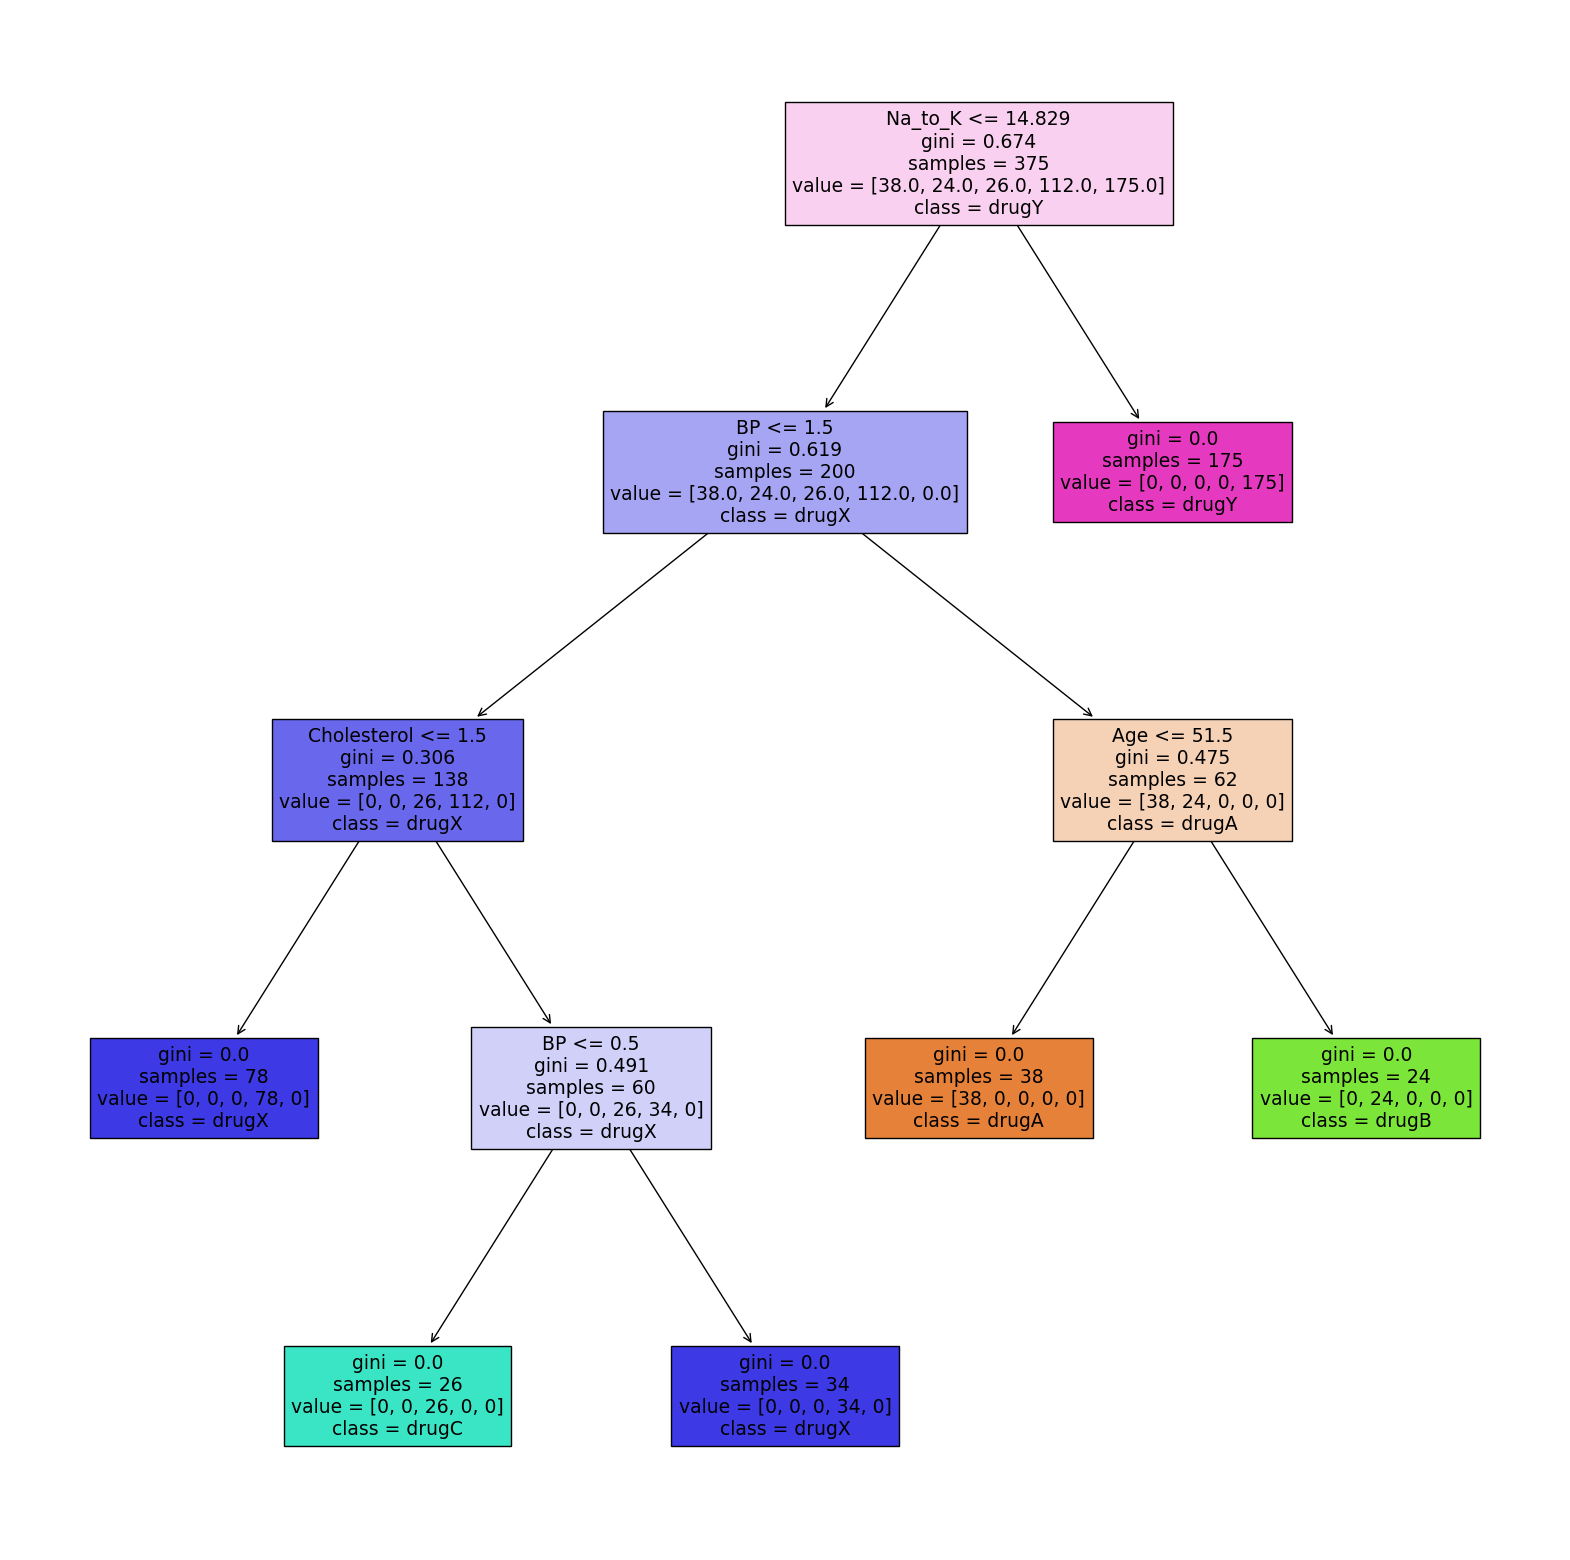

In [111]:
plt.figure(figsize=(20,20))
features = df_normalized.columns
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)


In [112]:
def confusion_matrix_plot(y_train_pred, y_train, type):
    print(type, "Matriz de Confusión")
    mdf = confusion_matrix(y_train_pred, y_train)
    sns.heatmap(mdf, annot = True, yticklabels = classes, xticklabels = classes, cmap = "Blues", fmt = "g")
    plt.tight_layout


test_score = accuracy_score(y_test_pred, y_test_encoded)
train_score = accuracy_score(y_train_pred, y_train_encoded)

print("Acuracy en Train: ", train_score)
print("Acuracy en Test: ", test_score)

Acuracy en Train:  1.0
Acuracy en Test:  0.992


Entrenamiento  Matriz de Confusión


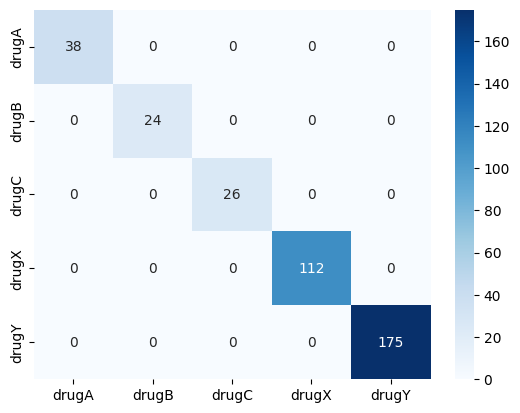

In [113]:
confusion_matrix_plot(y_train_pred, y_train_encoded, "Entrenamiento ")

Prueba  Matriz de Confusión


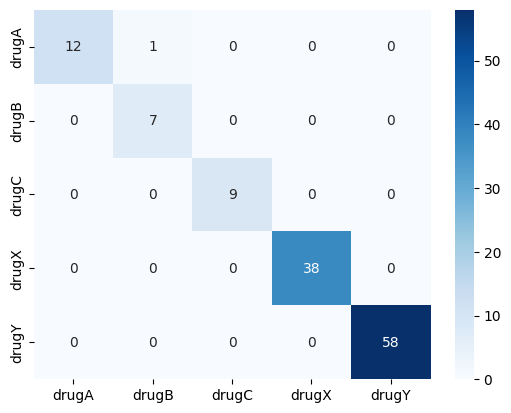

In [114]:
confusion_matrix_plot(y_test_pred, y_test_encoded, "Prueba ")

In [115]:
params = {
    "max_depth" : [2, 4, 6, 8, 10, 12],
    "min_samples_split" : [2, 3, 4],
    "min_samples_leaf" : [1, 2]
}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(x_train, y_train_encoded)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [116]:
model = gcv.best_estimator_
model.fit(x_train, y_train_encoded)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print('Accuracy en Train: ', accuracy_score(y_train_pred, y_train_encoded))
print('Accuracy en Test: ', accuracy_score(y_test_pred, y_test_encoded))

Accuracy en Train:  1.0
Accuracy en Test:  0.992


 Entrenamiento Matriz de Confusión


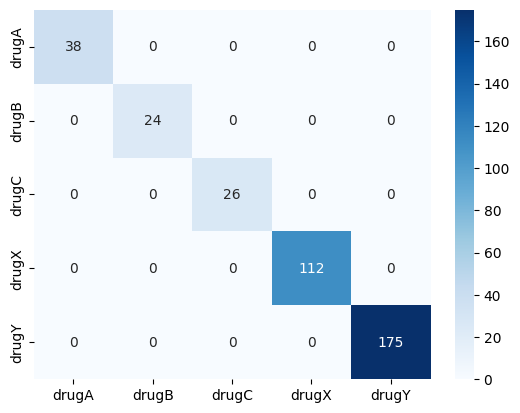

In [117]:
confusion_matrix_plot(y_train_pred, y_train, " Entrenamiento")

Test Matriz de Confusión


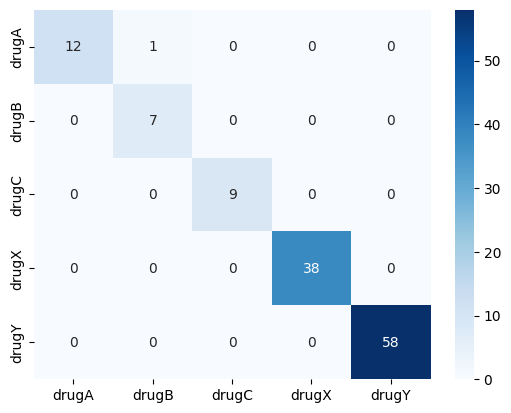

In [118]:
confusion_matrix_plot(y_test_pred, y_test, "Test")

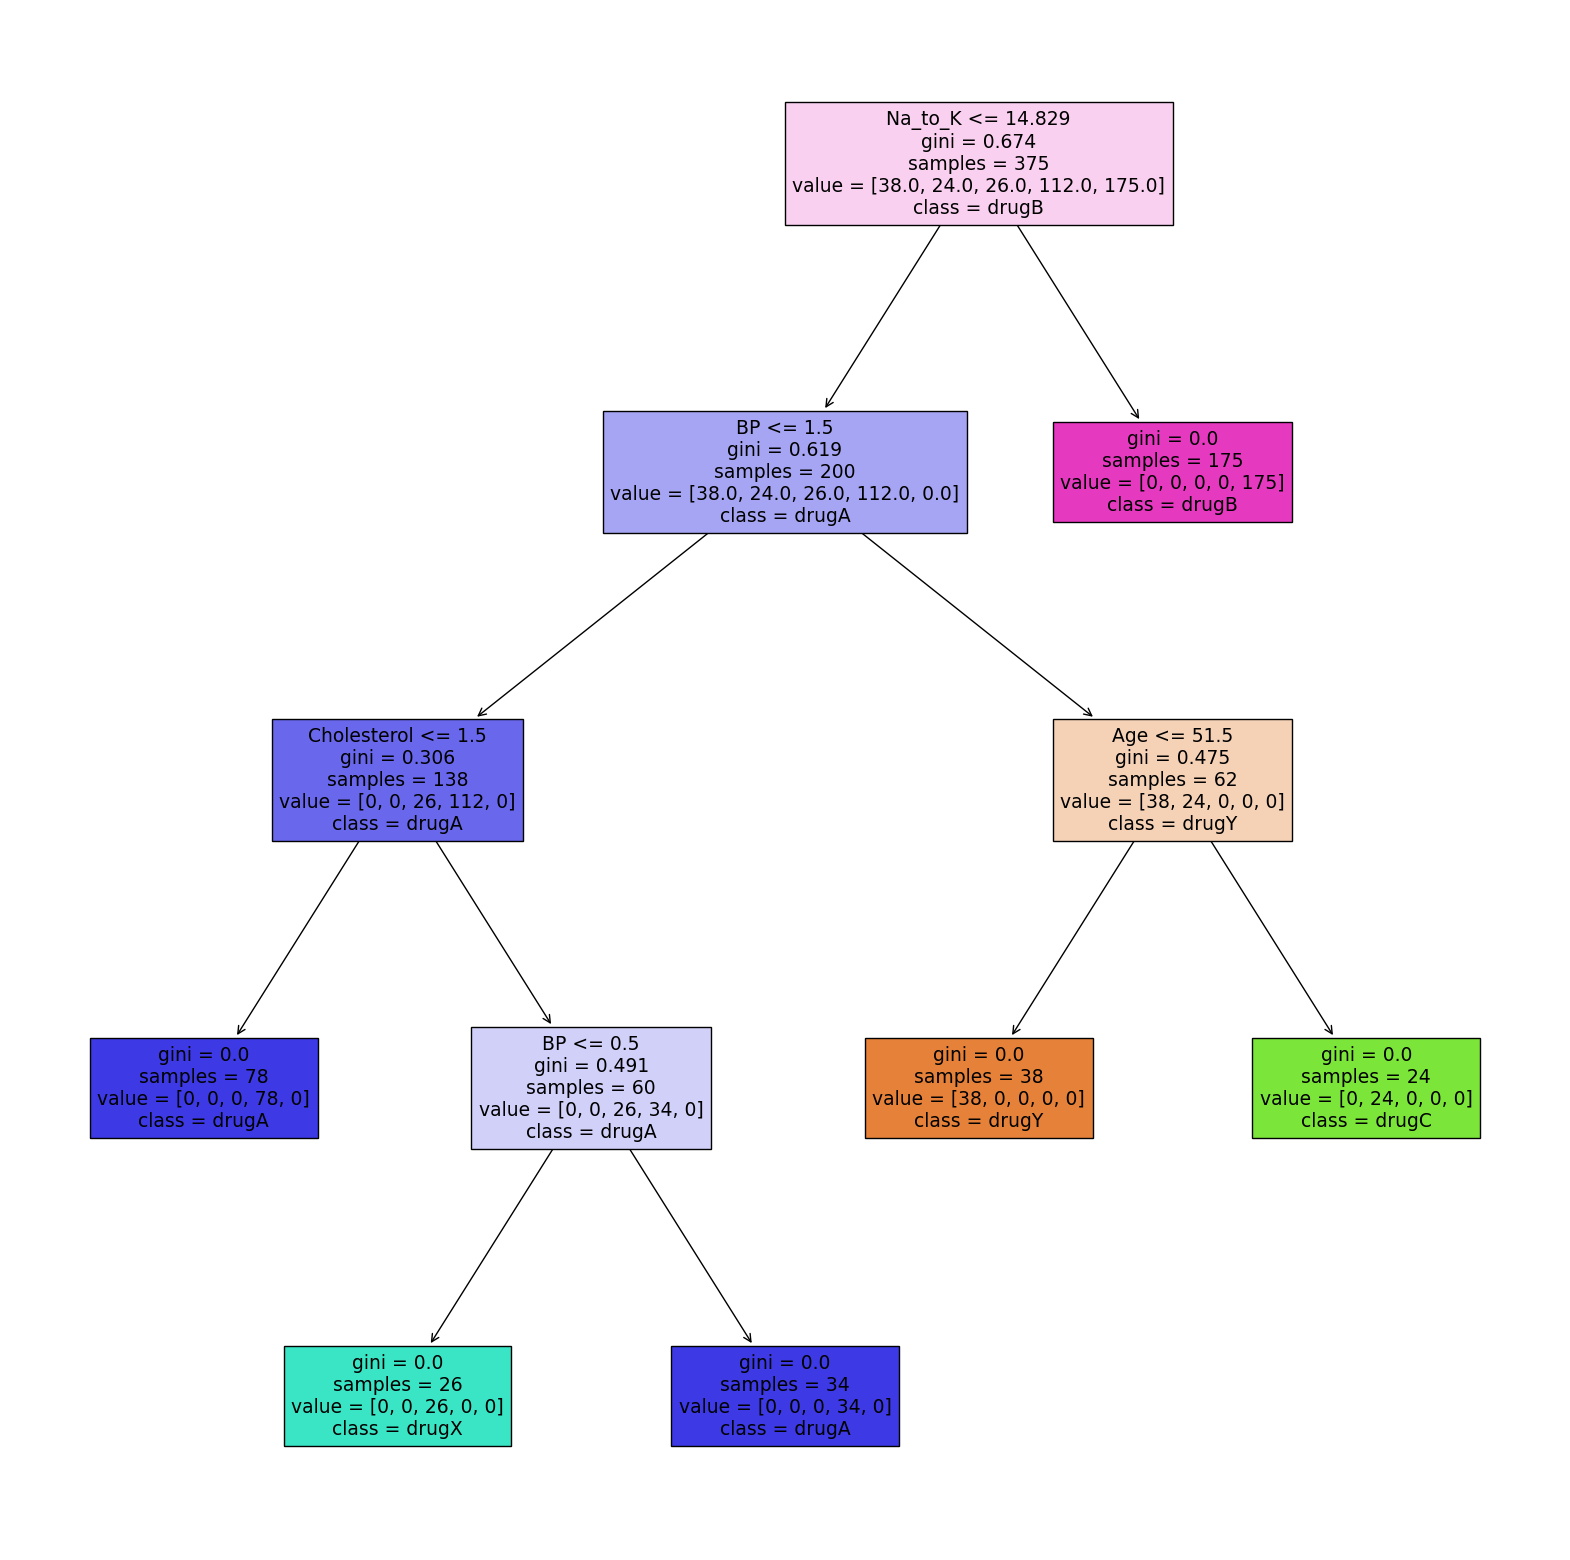

In [119]:
plt.figure(figsize=(20,20))
features = df_normalized.columns
classes = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

## Arbol de Decisión GINI

In [120]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [121]:
y_pred_gini = clf_gini.predict(x_test)

y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

In [123]:
accuracy_pred_train_gini = accuracy_score(y_train, y_pred_train_gini)
print("Training-set accuracy score: ", accuracy_pred_train_gini)

Training-set accuracy score:  0.9306666666666666


In [124]:
print("Training set score: ", clf_gini.score(x_train, y_train))
print("Test set score: ", clf_gini.score(x_test, y_test))

Training set score:  0.9306666666666666
Test set score:  0.92


## Visualización 

[Text(0.625, 0.875, 'x[4] <= 14.829\ngini = 0.674\nsamples = 375\nvalue = [38.0, 24.0, 26.0, 112.0, 175.0]'),
 Text(0.5, 0.625, 'x[2] <= 1.5\ngini = 0.619\nsamples = 200\nvalue = [38.0, 24.0, 26.0, 112.0, 0.0]'),
 Text(0.25, 0.375, 'x[3] <= 1.5\ngini = 0.306\nsamples = 138\nvalue = [0, 0, 26, 112, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 78\nvalue = [0, 0, 0, 78, 0]'),
 Text(0.375, 0.125, 'gini = 0.491\nsamples = 60\nvalue = [0, 0, 26, 34, 0]'),
 Text(0.75, 0.375, 'x[0] <= 51.5\ngini = 0.475\nsamples = 62\nvalue = [38, 24, 0, 0, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0, 0, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 175\nvalue = [0, 0, 0, 0, 175]')]

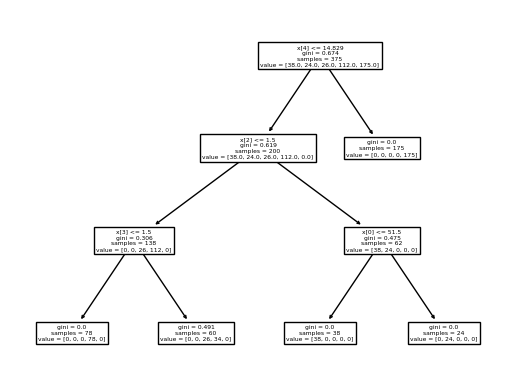

In [125]:
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [129]:
#Aqui deberia estar lo de graphviz

In [128]:
# Matriz de confusión 
mfcg = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', mfcg)

Confusion matrix

 [[12  0  0  0  0]
 [ 1  7  0  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 58]]


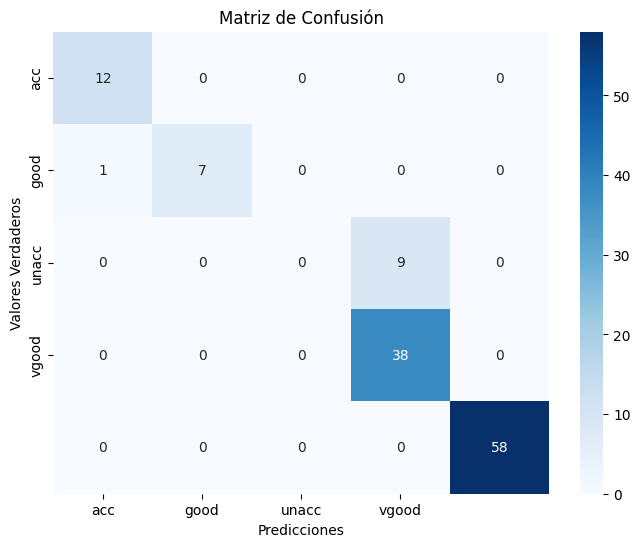

In [130]:
cm = confusion_matrix(y_test, y_pred_gini)

labels = ['acc', 'good', 'unacc', 'vgood'] 


# Usamos Seaborn para crear una visualización más atractiva
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Añadir los títulos y etiquetas correspondientes
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')

# Mostrar la figura
plt.show()


## Reporte

In [132]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8
           2       0.00      0.00      0.00         9
           3       0.81      1.00      0.89        38
           4       1.00      1.00      1.00        58

    accuracy                           0.92       125
   macro avg       0.75      0.78      0.76       125
weighted avg       0.86      0.92      0.89       125



C:\Users\gegdg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gegdg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gegdg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Post Pruning

In [133]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.05627053 0.07845161 0.13914066 0.34371556]


In [134]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

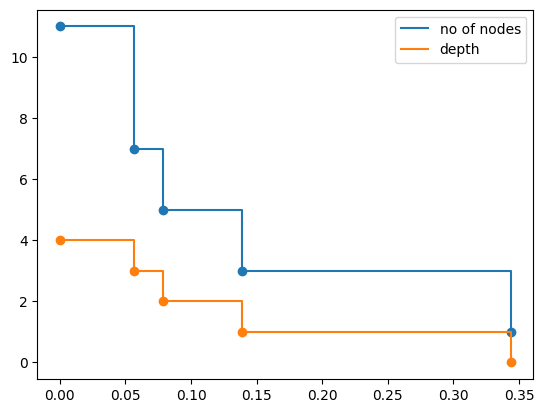

In [135]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

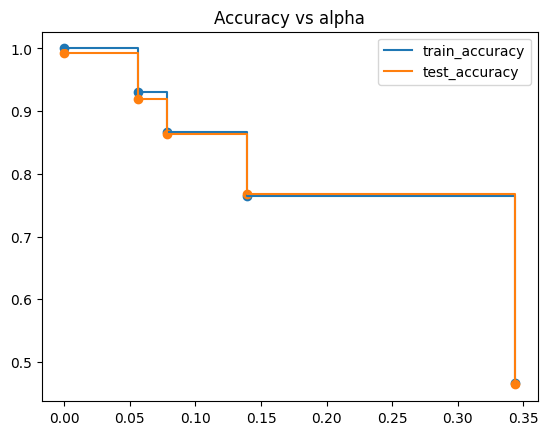

In [136]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score  1.0
Test score  0.992
Train Matriz de Confusión


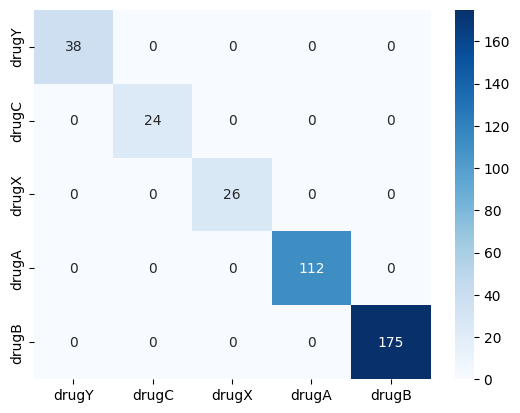

In [137]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.00)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print('Train score ',accuracy_score(y_train_pred,y_train))
print('Test score ', accuracy_score(y_test_pred,y_test))
confusion_matrix_plot(y_train_pred,y_train,'Train')

In [ ]:
confusion_matrix_plot(y_test_pred,y_test,' est')